# Regression

In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./../data/blocks.parquet')

In [2]:
from blocksnet.relations import generate_adjacency_graph

adjacency_graph = generate_adjacency_graph(blocks_gdf, 10)

2025-04-02 17:31:00.268 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_nodes:10 - Generating nodes
2025-04-02 17:31:00.278 | INFO     | blocksnet.relations.adjacency.core:_generate_adjacency_edges:15 - Generating edges
2025-04-02 17:31:02.045 | SUCCESS  | blocksnet.relations.adjacency.core:generate_adjacency_graph:34 - Adjacency graph successfully generated: 16320 nodes, 16036 edges


## Density

In [3]:
from blocksnet.machine_learning.regression import DensityRegressor

dr = DensityRegressor()

### Train

In [4]:
data = dr.get_train_data(blocks_gdf, adjacency_graph)

2025-04-02 17:31:05.163 | WARNING  | blocksnet.machine_learning.regression.density.schemas:_before_validate:37 - Not valid format. Trying to one hot from land_use column
2025-04-02 17:31:08.346 | INFO     | blocksnet.preprocessing.feature_engineering.core:_calculate_usual_features:34 - Calculating usual features
2025-04-02 17:31:08.622 | INFO     | blocksnet.machine_learning.regression.density.core:_features_from_geometries:32 - Fitting the scaler


In [5]:
losses = dr.train(data, epochs=10_000)

Current loss : 0.005: 100%|██████████| 10000/10000 [02:01<00:00, 82.44it/s]


### Test

In [6]:
dr.test(data)

0.005466420669108629

### Evaluate

In [7]:
result_df = dr.evaluate(blocks_gdf, adjacency_graph)

2025-04-02 17:33:10.039 | WARNING  | blocksnet.machine_learning.regression.density.schemas:_before_validate:37 - Not valid format. Trying to one hot from land_use column
2025-04-02 17:33:13.063 | INFO     | blocksnet.preprocessing.feature_engineering.core:_calculate_usual_features:34 - Calculating usual features


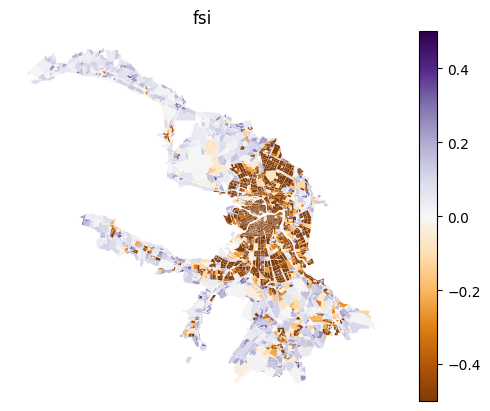

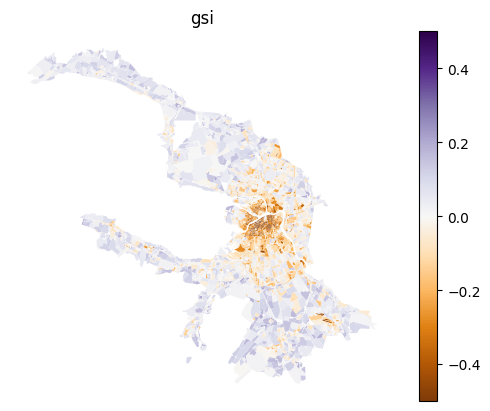

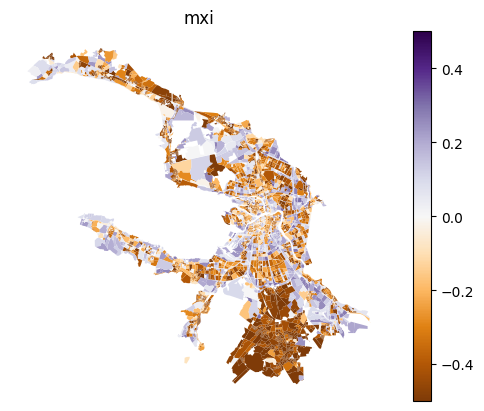

In [11]:
df = result_df.copy()
for column in df.columns:
  df[column] -= blocks_gdf[column]
  ax = blocks_gdf[['geometry']].join(df).plot(column, cmap='PuOr', legend=True, vmin=-0.5, vmax=0.5)
  ax.set_title(column)
  ax.set_axis_off()

In [9]:
df

,fsi,gsi,mxi
id,,,
0,0.100163,0.137315,-0.432792
1,-0.403819,-0.177566,-0.137625
2,0.144101,0.113765,-0.494679
3,0.119651,0.146806,-0.350166
4,0.034816,0.095726,-0.463465
...,...,...,...
16315,0.002206,0.002206,NaN
16316,0.005179,0.005179,NaN
16317,0.013172,0.013172,NaN


## Save model and scaler

In [10]:
dr.save_model('model.dict')
dr.save_scaler('scaler.save')